# Breast Cancer

**Data Set Information:**

There are two classes (binary classification): “no-recurrence-events” and “recurrence-events”, that describe whether the patient’s cancer reappeared after treatment. The other 9 attributes contain general information about the patients themselves as well as more specific information about their individual cancer diagnoses. Using this information the goal is to classify whether a patient will have breast cancer again, or not


**Attribute Information:**

**- Class:** Describes if a patient had recurrent tumors;<br>
**- age:** Age listed in Interval of 10 years;<br>
**- menopause:** Nominal Short text description;<br>
**- tumor-size:** Interval in which falls the diamater of tumor falls;<br>
**- inv-nodes:** Interval in which falls the number of lymph-nodes in close proximity of the tumor;<br>
**- node-caps:** Nominal Describe whenever there're metastases or not;<br>
**- deg-malig:** Numerical Describe how bad the cancer is;<br>
**- breast:** Nominal Describe the afflicted breast;<br>
**- breast-quad:** Nominal Text representing the location of  tumor in the breast.<br>
**- irradiate** Nominal yes/no Indicates whenever the patient underwent radiation therapy.

### Import Libraries

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_selection import SelectPercentile, chi2, SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

### Get the data

In [242]:
data = pd.read_csv('breast-cancer.csv')

*Remove quotation marks*

In [243]:
for column in data:
    data[column] = data[column].map(lambda x: x.lstrip("'").rstrip("'"))

In [244]:
data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


### Basic Data Information

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    286 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  286 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: object(10)
memory usage: 11.2+ KB


In [246]:
data.describe()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
count,286,286,286,286,286,286,286,286,286,286
unique,6,3,11,7,3,3,2,6,2,2
top,50-59,premeno,30-34,0-2,no,2,left,left_low,no,no-recurrence-events
freq,96,150,60,213,222,130,152,110,218,201


### Check missing values

In [247]:
data.loc[(data['age'] == '?') | (data['menopause'] == '?') | \
         (data['tumor-size'] == '?') | (data['inv-nodes'] == '?') | \
         (data['node-caps'] == '?') | (data['deg-malig'] == '?') | \
         (data['breast'] == '?') | (data['breast-quad'] == '?') | \
         (data['irradiat'] == '?') | (data['Class'] == '?')] 

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
20,50-59,lt40,20-24,0-2,?,1,left,left_low,no,recurrence-events
31,60-69,ge40,25-29,3-5,?,1,right,left_low,yes,no-recurrence-events
50,70-79,ge40,15-19,9-11,?,1,left,left_low,yes,recurrence-events
54,40-49,premeno,25-29,0-2,?,2,left,right_low,yes,no-recurrence-events
71,60-69,ge40,25-29,3-5,?,1,right,left_up,yes,no-recurrence-events
92,50-59,lt40,20-24,0-2,?,1,left,left_up,no,recurrence-events
149,50-59,ge40,30-34,9-11,?,3,left,left_up,yes,no-recurrence-events
240,50-59,ge40,30-34,0-2,no,3,left,?,no,recurrence-events
264,50-59,ge40,30-34,9-11,?,3,left,left_low,yes,no-recurrence-events


*Convert missing data (indicated by a ?) into NaN*

In [248]:
data.replace("?", np.nan, inplace = True)

*Fill missing value with median*

In [249]:
data = data.fillna(data.mode().iloc[0])
#data = data.dropna()

In [250]:
print(data.isnull().sum())

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64


# Exploratory Data Analysis

In [251]:
c_palette = ['tab:red','tab:green']

*Countplot of the Target* 

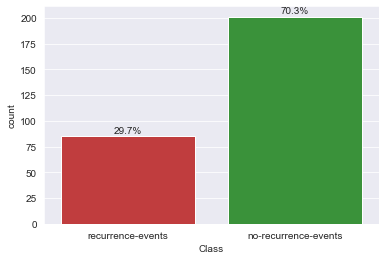

In [252]:
sns.set_style('darkgrid')
ax = sns.countplot(x = data['Class'], palette=c_palette)

total = len(data['Class'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/total),
            ha="center")

**Class on Age Interval**

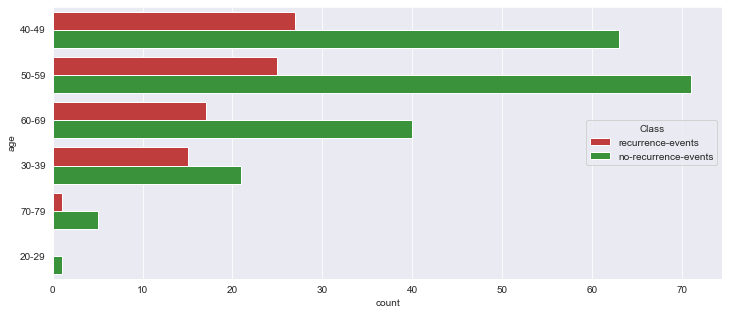

In [253]:
plt.figure(figsize=(12, 5))
sns.countplot(y="age", hue="Class", data=data, palette=c_palette)
plt.show()

**Class on Menopause**

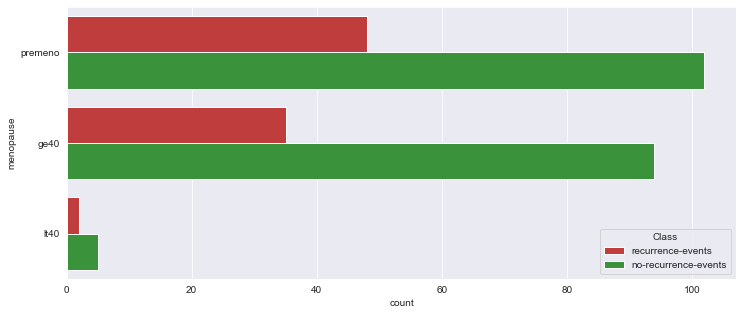

In [254]:
plt.figure(figsize=(12, 5))
sns.countplot(y="menopause", hue="Class", data=data, palette=c_palette)
plt.show()

**Class on Breast**

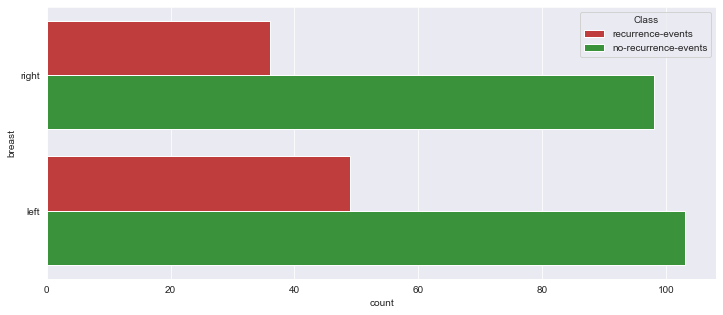

In [255]:
plt.figure(figsize=(12, 5))
sns.countplot(y="breast", hue="Class", data=data, palette=c_palette)
plt.show()

**Class on Breast-Quad**

*Divide par Left/Right breast*

In [256]:
right_b = data.loc[data['breast'] == 'right']
left_b = data.loc[data['breast'] == 'left']

[Text(0, 0.5, 'Right Breast')]

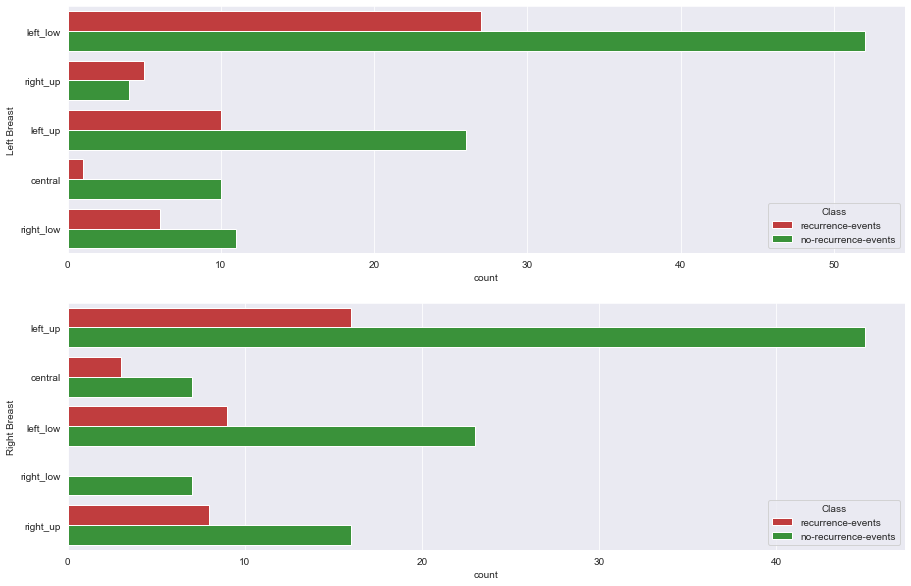

In [257]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,1,1)
sns.countplot(y=left_b['breast-quad'], hue="Class", data=data, ax = ax1, palette=c_palette)
ax1.set(ylabel='Left Breast')

ax2 = fig.add_subplot(2,1,2)
sns.countplot(y=right_b['breast-quad'], hue="Class", data=data, ax=ax2, palette=c_palette)
ax2.set(ylabel='Right Breast')

**Class on Degree of Malignancy**

c:\users\enric\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\enric\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Class', ylabel='deg-malig'>

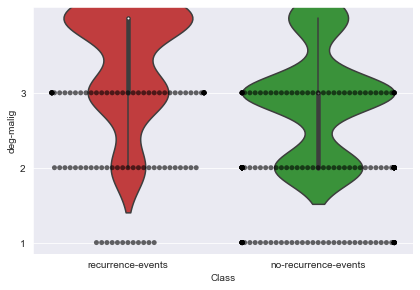

In [258]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,2,1)
deg_malig = data['deg-malig'].astype(float)
sns.violinplot(data = data, x='Class', y=deg_malig, ax=ax1, palette=c_palette)
sns.swarmplot(data = data, x='Class', y='deg-malig', color = 'k', alpha = 0.6, ax=ax1)

**Class on Lymph-Nodes**

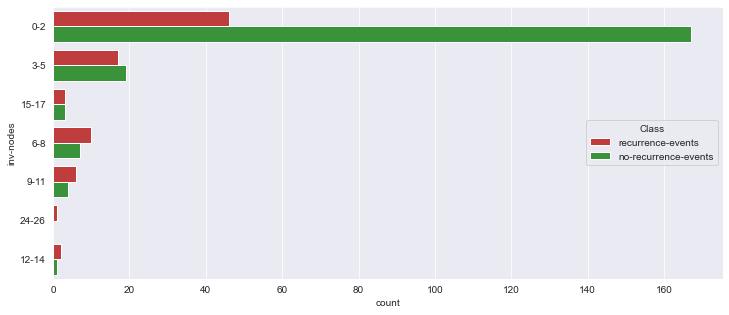

In [259]:
plt.figure(figsize=(12, 5))
sns.countplot(y="inv-nodes", hue="Class", data=data, palette=c_palette)
plt.show()

**Class on Metastases**

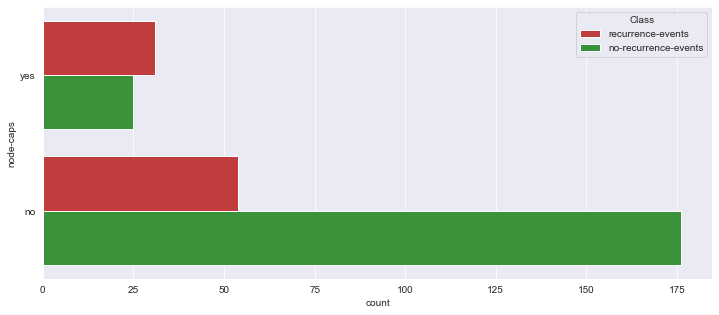

In [260]:
plt.figure(figsize=(12, 5))
sns.countplot(y="node-caps", hue="Class", data=data, palette=c_palette)
plt.show()

**Class on Irradiate**

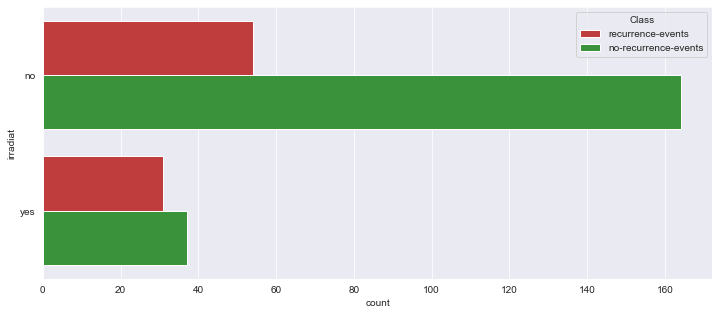

In [261]:
plt.figure(figsize=(12, 5))
sns.countplot(y="irradiat", hue="Class", data=data, palette=c_palette)
plt.show()

# Classifier 

#### Import Libraries

In [262]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#### General pre-processing

#### Encode Class Feature

In [263]:
#Encode the Class feature to be a binary one
data['Class'][data.Class == 'recurrence-events'] = 1
data['Class'][data.Class == 'no-recurrence-events'] = 0

#### Preprocess Ordinal Data (LabelEncoder)

In [264]:
#replace binary data
data = data.replace(to_replace=['no', 'yes'], value=['0', '1'])

#preprocess the ordinal data (hierarchy) 
data["age"] = data["age"].map({'20-29':0, '30-39':1, '40-49':2, '50-59':3, '60-69':4, '70-79':5 })

data["inv-nodes"] = data["inv-nodes"].map({'0-2':0, '3-5':1, '6-8':2, '9-11':3, '12-14':4, '15-17':5,'24-26':7})

data["tumor-size"] = data["tumor-size"].map({'0-4':0, '5-9':1, '10-14':2, '15-19':3, '20-24':4, '25-29':5, '30-34':5, '35-39':6, '40-44':7, 
        '45-49':8, '50-54':9 })
data.head()


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,2,premeno,3,0,1,3,right,left_up,0,1
1,3,ge40,3,0,0,1,right,central,0,0
2,3,ge40,6,0,0,2,left,left_low,0,1
3,2,premeno,6,0,1,3,right,left_low,1,0
4,2,premeno,5,1,1,2,left,right_up,0,1


#### Preprocess Non-Ordinal Data using OneHotEncoding

In [265]:
#processing label with no hierarchy
nominal = ["breast-quad", "breast", "menopause"]
for i in nominal:
    one_hot = pd.get_dummies(data[i])
    data = data.drop(i,axis = 1)
    data = data.join(one_hot)
    
data.head()

,age,tumor-size,inv-nodes,node-caps,deg-malig,irradiat,Class,central,left_low,left_up,right_low,right_up,left,right,ge40,lt40,premeno
0,2,3,0,1,3,0,1,0,0,1,0,0,0,1,0,0,1
1,3,3,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
2,3,6,0,0,2,0,1,0,1,0,0,0,1,0,1,0,0
3,2,6,0,1,3,1,0,0,1,0,0,0,0,1,0,0,1
4,2,5,1,1,2,0,1,0,0,0,0,1,1,0,0,0,1


#### Split data in train and test

In [266]:
#split the data in attributes and class as well as training and test sets
X = data.drop('Class', axis=1)
y = data['Class']

##  2.1) Feature Selection 

**Choose one of the methods:**
1. SelectPercentile (chi2)
2. SelectFromModel (LinearSVC)
3. SelectFromModel (LogisticRegression)
3. SelectFromModel (ExtraTreesClassifier)

## 2.2) Data Pre-processing

**Choose one of the methods:**
1. Standardization (StandardScaler)
2. Standardization (RobustScaler)
3. MinMaxScaler
4. Normalization

## 2.3)Outliers Detection using mathematical function Z-Score


### All three features included in the following function:

In [267]:
def featureSelection(XCurr, yCurr, featureselection_method, preprocessing_method):
    if featureselection_method == 1:
        selection = SelectPercentile(chi2, percentile=5)
    elif featureselection_method == 2:
        clf = LinearSVC()
        #clf = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X, y)
        selection = SelectFromModel(clf, prefit=False)
    elif featureselection_method == 3:
        clf = LogisticRegression()
        #clf = LogisticRegression(C=0.2, penalty="l2", dual=False, max_iter=200).fit(X, y)
        selection = SelectFromModel(clf, prefit=False)
    elif featureselection_method == 4:
        clf = ExtraTreesClassifier(n_estimators=50).fit(XCurr, yCurr)
        selection = SelectFromModel(clf, prefit=False)      

    clf.feature_importances_ 
    X_transformed = selection.fit_transform(XCurr, yCurr)
    columns = np.asarray(XCurr.columns.values)
    support = np.asarray(selection.get_support())
    columns_with_support = columns[support]
    print("X_transformed.shape",X_transformed.shape)

    
    #Data Pre-processing:
    if preprocessing_method == 1:
        scaler = StandardScaler()
        scaler = scaler.fit(X_transformed)
        X_scaled = scaler.transform(X_transformed)
    elif preprocessing_method == 2:
        scaler = RobustScaler()
        scaler = scaler.fit(X_transformed)
        X_scaled = scaler.transform(X_transformed)
    elif preprocessing_method == 3:
        scaler = preprocessing.MinMaxScaler()
        scaler = scaler.fit(X_transformed)
        X_scaled = scaler.transform(X_transformed)
    elif preprocessing_method == 4:
        scaler = preprocessing.Normalizer()
        scaler = scaler.fit(X_transformed)
        X_scaled = scaler.transform(X_transformed)
    print("X_scaled = ",X_scaled)
    
    
    #Outlier Detection:
    z = np.abs(stats.zscore(X_scaled))
    threshold = 20
    outliers_rows = np.where(z > threshold)
    print("\n z > threshold = ", np.where(z > threshold))
    # The first array contains the list of row numbers and second array respective column numbers
    print("\n number of outliers = ",len(set(outliers_rows[0])))
    
    #Remove Ouliers
    #X_prepared = X_scaled[(np.abs(stats.zscore(X_scaled)) < threshold).all(axis=1)]
    #X_prepared.shape
    #y = y.to_numpy()
    
    #X_train, X_test, y_train, y_test = train_test_split(X_scaled, yCurr, test_size=0.30)
    #return(X_train, X_test, y_train, y_test)
    return(X_scaled, yCurr)

In [268]:
featureselection_method = 4
preprocessing_method = 1

In [269]:
print('\n-------------------both types ------------------\n')
X, y = featureSelection(X, y, featureselection_method, preprocessing_method)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


-------------------both types ------------------

X_transformed.shape (286, 5)
X_scaled =  [[-0.65772695 -0.85232053 -0.46219607  2.02660871  1.29056424]
 [ 0.33232519 -0.85232053 -0.46219607 -0.49343516 -1.42341644]
 [ 0.33232519  0.86432505 -0.46219607 -0.49343516 -0.0664261 ]
 ...
 [-1.64777909  0.29210985  1.31214053  2.02660871 -0.0664261 ]
 [ 0.33232519 -0.85232053 -0.46219607 -0.49343516 -0.0664261 ]
 [ 0.33232519  1.43654024 -0.46219607 -0.49343516  1.29056424]]

 z > threshold =  (array([], dtype=int32), array([], dtype=int32))

 number of outliers =  0


## Models Prediction

**Types:**
- Linear Classifiers: Logistic Regression, Naive Bayes Classifier
- Nearest Neighbor
- Support Vector Machines
- Decision Trees
- Random Forest
- Neural Networks

In [270]:
NN = 1

d = {}

d["Logistic Regression"] = LogisticRegression(max_iter=200)
d["Gaussian Naive Bayes"] = GaussianNB()

d["KNearest Neighbors ("+ str(NN) + ")"] = KNeighborsClassifier(n_neighbors=NN)

d["SVM rbf"] = SVC()
d["SGD Classifier"] = SGDClassifier()

d["Decision Tree"] = DecisionTreeClassifier()

d["Random Forest"] = RandomForestClassifier()

d["Multi-layer Perceptron Classifier"] = MLPClassifier(max_iter=1000)

### Find best classifier

In [271]:
scoreList = []
nameList = []

for name, clf in d.items():
    start = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scoreList.append(accuracy_score(y_test, y_pred))
    nameList.append(name)

    end = time.time()
    print("\n--------------",name,"---------------\n")
    print("- Accuracy: %0.3f" % score, "- Time: %0.2f" % (end - start), "seconds")
    print("\n Number of mislabeled points out of a total %d points : %d \n\n"% (X_test.shape[0], (y_test != y_pred).sum()))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

print("###############")
ranking = sorted(zip(scoreList,nameList))[::-1]
#print(sorted(zip(scoreList,nameList)))
print("\nClassifiers from best to worst:")
for i in range(0, len(ranking)):
    print(i+1, ') {0:35} score: {1}'.format(ranking[i][1], ranking[i][0]))


-------------- Logistic Regression ---------------

- Accuracy: 0.767 - Time: 0.01 seconds

 Number of mislabeled points out of a total 86 points : 20 


[[60  2]
 [18  6]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        62
           1       0.75      0.25      0.38        24

    accuracy                           0.77        86
   macro avg       0.76      0.61      0.62        86
weighted avg       0.76      0.77      0.72        86


-------------- Gaussian Naive Bayes ---------------

- Accuracy: 0.791 - Time: 0.00 seconds

 Number of mislabeled points out of a total 86 points : 18 


[[58  4]
 [14 10]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        62
           1       0.71      0.42      0.53        24

    accuracy                           0.79        86
   macro avg       0.76      0.68      0.70        86
weighted avg       0.78      0.79      0.77        8

c:\users\enric\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Hyperparameter Optimization

### Gaussian Naive Bayes

In [274]:
# defining parameter range 
'''param_grid_1 = {'n_neighbors': range(1,25),
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}  '''

parameters = []

param_grid_1 = {
    'priors': [None],
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001]
}

parameters.append(param_grid)

start = time.time()
clf_gridsearch = GridSearchCV(d.get(ranking[1][1]), param_grid_1, verbose = 0)
clf_gridsearch.fit(X_train, y_train)
print(clf_gridsearch.best_params_)
predictions = clf_gridsearch.predict(X_test)
score_gridsearch = accuracy_score(y_test, predictions)
end = time.time()
print("GridSearchCV - Accuracy: %0.3f" % score_gridsearch, "- Time: %0.2f" % (end - start), "seconds")
print("Previous Accuracy: ", ranking[1][0])
print()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


{'priors': None, 'var_smoothing': 1e-08}
GridSearchCV - Accuracy: 0.791 - Time: 0.06 seconds
Previous Accuracy:  0.7906976744186046

[[55  7]
 [12 12]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        62
           1       0.63      0.50      0.56        24

    accuracy                           0.78        86
   macro avg       0.73      0.69      0.71        86
weighted avg       0.77      0.78      0.77        86



### SVM

In [273]:
param_grid = {'C': [1, 10], 
              'gamma': [0.001, 0.01, 1]
             }

parameters.append(param_grid)

start = time.time()
clf_gridsearch = GridSearchCV(d.get(ranking[0][1]), param_grid, verbose = 0)
clf_gridsearch.fit(X_train, y_train)
print(clf_gridsearch.best_params_)
predictions = clf_gridsearch.predict(X_test)
score_gridsearch = accuracy_score(y_test, predictions)
end = time.time()
print("GridSearchCV - Accuracy: %0.3f" % score_gridsearch, "- Time: %0.2f" % (end - start), "seconds")
print("Previous Accuracy: ", ranking[0][0])
print()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

{'C': 10, 'gamma': 0.01}
GridSearchCV - Accuracy: 0.756 - Time: 0.12 seconds
Previous Accuracy:  0.7906976744186046

[[55  7]
 [12 12]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        62
           1       0.63      0.50      0.56        24

    accuracy                           0.78        86
   macro avg       0.73      0.69      0.71        86
weighted avg       0.77      0.78      0.77        86



### Logistic Regression 

In [ ]:
param_grid = {
    'penalty' : ['l1','l2'],
    'C': [0.1, 1, 10], 
    'max_iter': [100, 1000]}

parameters.append(param_grid)

start = time.time()
clf_gridsearch = GridSearchCV(d.get(ranking[2][1]), param_grid, verbose = 0)
clf_gridsearch.fit(X_train, y_train)
print(clf_gridsearch.best_params_)
predictions = clf_gridsearch.predict(X_test)
score_gridsearch = accuracy_score(y_test, predictions)
end = time.time()
print("GridSearchCV - Accuracy: %0.3f" % score_gridsearch, "- Time: %0.2f" % (end - start), "seconds")
print("Previous Accuracy: ", ranking[2][0])
print()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Compare with k-fold cross validation

KNN: 0.700000 (0.080080)
NBayes: 0.720567 (0.076858)
RandomForest: 0.692857 (0.065099)
DTree: 0.692611 (0.057817)
SVM: 0.744951 (0.078383)
LRegression: 0.720813 (0.097754)


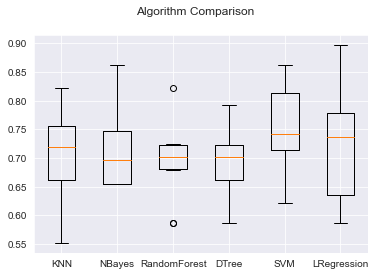

In [275]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []

models.append(('KNN', KNeighborsClassifier(n_neighbors=16)))
models.append(('NBayes', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('DTree', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

models.append(('LRegression', LogisticRegression(max_iter=200)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()